In [1]:
import os

while '.gitignore' not in os.listdir():
    os.chdir('..')
# print(os.listdir())


from jax import numpy as jnp
from jax.image import resize
from src import img_utils, img_plot_utils
import matplotlib.pyplot as plt
import cv2

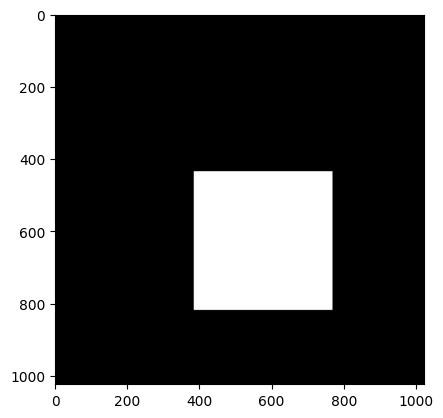

In [4]:
x, y = jnp.meshgrid(
    jnp.linspace(-2, 2, 1024),
    jnp.linspace(-2, 2, 1024),
)
image = jnp.where( (x<1) & (x>-0.5) & (y>-0.3) & (y<1.2), 1, 0)
plt.imshow(image, cmap='gray')


# We will now talk about the partial derivatives

## The first order derivatives

$$f_x(x) = f(x+1) - f(x)$$
$$f_y(x) = f(y+1) - f(y)$$

A much better way of defining them for images is by using the following:

$$f_x(x,y) = f(x, y) \ast d_1(x) \ast p(y) $$
$$f_y(x,y) = f(x, y) \ast p(x) \ast d_1(y) $$



This is already implemented in the "Line detection" segment. 

## The second order derivatives

$$f_{xx}(x) = f(x+1) - 2f(x) + f(x-1)$$
$$f_{yy}(y) = f(y+1) - 2f(y) + f(y-1)$$
$$ \nabla^2 =  f_{xx} + f_{yy} $$

A much better way of doing this is by doing the following

$$f_{xx}(x,y) = f(x, y) \ast d_2(x) \ast p(y) $$
$$f_{yy}(x,y) = f(x, y) \ast p(x) \ast d_2(y) $$

## Values for these

Here, 
- $p = [ 0.030320,  0.249724, 0.439911, 0.249724, 0.030320]$
- $d_1 = [-0.104550, -0.292315, 0,        0.292315, 0.104550]$
- $d_2 = [0.471147, -0.002668, -0.232905, -0.002668, 0.471147]$ 

Note that the $d$ is the _derivative filter_ and $p$ is a low-pass _pre-filter_.

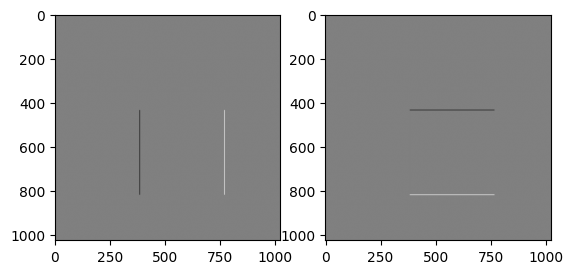

In [6]:
img_x, img_y = img_utils.first_derivatives(image)

_, (ax1, ax2) = plt.subplots( 1, 2 )
ax1.imshow( img_x, cmap='gray' )
ax2.imshow( img_y, cmap='gray' )
plt.show()

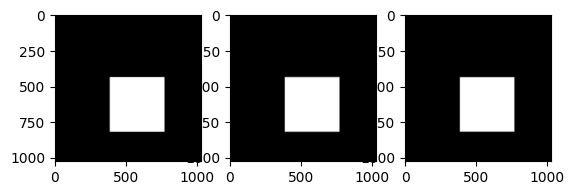

In [8]:
img_x, img_y = img_utils.second_derivatives(image)

_, (ax1, ax2, ax3) = plt.subplots( 1, 3 )
ax1.imshow( img_x, cmap='gray' )
ax2.imshow( img_y, cmap='gray' )
ax3.imshow( img_x**2 + img_y**2 , cmap='gray')
plt.show()